Refrence - Nipun Batra Sir

In [ ]:
import torch
import torch.nn.functional as F
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt # for making figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pprint import pprint

In [ ]:
torch.__version__

'2.5.1+cu124'

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cpu')

In [ ]:
# Get some names from https://github.com/MASTREX/List-of-Indian-Names

In [ ]:
!wget https://raw.githubusercontent.com/balasahebgulave/Dataset-Indian-Names/master/Indian_Names.csv -O names-long.csv

--2025-02-09 09:56:19--  https://raw.githubusercontent.com/balasahebgulave/Dataset-Indian-Names/master/Indian_Names.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85538 (84K) [text/plain]
Saving to: ‘names-long.csv’

names-long.csv      100%[===================>]  83.53K  --.-KB/s    in 0.01s   

2025-02-09 09:56:20 (5.67 MB/s) - ‘names-long.csv’ saved [85538/85538]



In [ ]:
!head names-long.csv

,Name
0,aabid
1,aabida
2,aachal
3,aadesh
4,aadil
5,aadish
6,aaditya
7,aaenab
8,aafreen


In [ ]:
!tail names-long.csv

6476,zeshan
6477,zhini
6478,ziarul
6479,zile
6480,zina
6481,zishan
6482,ziyabul
6483,zoya
6484,zuhaib
6485,zuveb


In [ ]:
words = pd.read_csv('names-long.csv')["Name"]
words = words.str.lower()
words = words.str.strip()
words = words.str.replace(" ", "")

words = words[words.str.len() > 2]
words = words[words.str.len() < 10]

# Randomly shuffle the words
words = words.sample(frac=1).reset_index(drop=True)
words = words.tolist()

# Remove words having non alphabets
words = [word for word in words if word.isalpha()]
words[:10]


['toquir',
 'mehvish',
 'hani',
 'safina',
 'shetan',
 'kumkum',
 'abhinwav',
 'rishaw',
 'khumlo',
 'kundin']

In [ ]:
len(words)

6184

In [ ]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
pprint(itos)

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}


In [ ]:
block_size = 4 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:]:

  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

# Move data to GPU

X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)

Streaming output truncated to the last 5000 lines.
ampr ---> a
mpra ---> s
pras ---> a
rasa ---> d
asad ---> .
.... ---> b
...b ---> a
..ba ---> s
.bas ---> a
basa ---> n
asan ---> t
sant ---> a
anta ---> .
.... ---> s
...s ---> u
..su ---> b
.sub ---> j
subj ---> e
ubje ---> e
bjee ---> t
jeet ---> .
.... ---> c
...c ---> h
..ch ---> h
.chh ---> o
chho ---> t
hhot ---> u
hotu ---> .
.... ---> d
...d ---> u
..du ---> n
.dun ---> i
duni ---> .
.... ---> m
...m ---> u
..mu ---> s
.mus ---> h
mush ---> r
ushr ---> r
shrr ---> a
hrra ---> f
rraf ---> .
.... ---> m
...m ---> a
..ma ---> y
.may ---> u
mayu ---> r
ayur ---> .
.... ---> a
...a ---> r
..ar ---> n
.arn ---> a
arna ---> b
rnab ---> .
.... ---> k
...k ---> a
..ka ---> v
.kav ---> i
kavi ---> t
avit ---> .
.... ---> v
...v ---> a
..va ---> n
.van ---> s
vans ---> h
ansh ---> .
.... ---> v
...v ---> a
..va ---> i
.vai ---> s
vais ---> h
aish ---> a
isha ---> l
shal ---> i
hali ---> .
.... ---> m
...m ---> a
..ma ---> y
.may ---> a
m

In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([44325, 4]), torch.int64, torch.Size([44325]), torch.int64)

In [ ]:
# Embedding layer for the context

emb_dim = 2
emb = torch.nn.Embedding(len(stoi), emb_dim)


In [ ]:
emb.weight

Parameter containing:
tensor([[ 0.3302, -0.3692],
        [ 0.9060,  0.0802],
        [-0.8007, -0.0176],
        [-0.6351,  0.0086],
        [-1.6728,  0.0200],
        [ 1.9683, -0.9466],
        [ 0.8812,  1.0438],
        [ 1.1800, -1.1488],
        [ 0.3910,  0.7421],
        [-0.4696, -0.3230],
        [-0.7808, -0.5305],
        [-0.2402, -0.3208],
        [ 1.0316,  0.7068],
        [-0.0734,  0.4368],
        [-0.2730,  0.6568],
        [-1.2073, -1.3504],
        [ 0.1990,  1.3636],
        [ 0.7788, -0.0126],
        [-0.4641,  0.7163],
        [ 1.3401,  0.9264],
        [ 0.9165,  0.7243],
        [-0.0962,  0.2106],
        [-0.1997, -0.7530],
        [ 1.6594,  0.9686],
        [ 0.9921,  0.6059],
        [ 0.9854,  2.0283],
        [-0.2313, -0.9176]], requires_grad=True)

In [ ]:
emb.weight.shape

torch.Size([27, 2])

<Axes: >

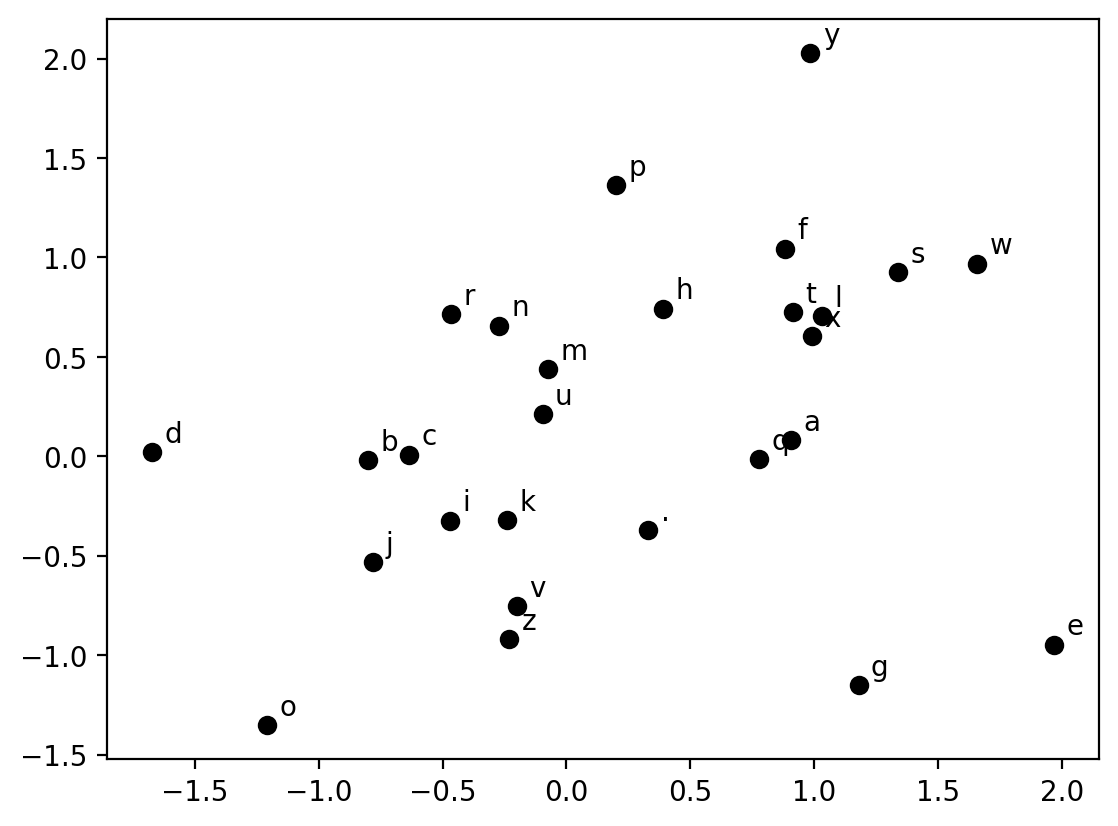

In [ ]:
# Function to visualize the embedding in 2d space

def plot_emb(emb, itos, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    for i in range(len(itos)):
        x, y = emb.weight[i].detach().cpu().numpy()
        ax.scatter(x, y, color='k')
        ax.text(x + 0.05, y + 0.05, itos[i])
    return ax

plot_emb(emb, itos)

In [ ]:
class NextChar(nn.Module):
  def __init__(self, block_size, vocab_size, emb_dim, hidden_size):
    super().__init__()
    self.emb = nn.Embedding(vocab_size, emb_dim)
    self.lin1 = nn.Linear(block_size * emb_dim, hidden_size)
    self.lin2 = nn.Linear(hidden_size, vocab_size)

  def forward(self, x):
    x = self.emb(x)
    x = x.view(x.shape[0], -1)
    x = torch.sin(self.lin1(x))
    x = self.lin2(x)
    return x


In [ ]:
# Generate names from untrained model


model = NextChar(block_size, len(stoi), emb_dim, 10).to(device)
model = torch.compile(model)

g = torch.Generator()
g.manual_seed(4000002)
def generate_name(model, itos, stoi, block_size, max_len=10):
    context = [0] * block_size
    name = ''
    for i in range(max_len):
        x = torch.tensor(context).view(1, -1).to(device)
        y_pred = model(x)
        ix = torch.distributions.categorical.Categorical(logits=y_pred).sample().item()
        ch = itos[ix]
        if ch == '.':
            break
        name += ch
        context = context[1:] + [ix]
    return name

for i in range(10):
    print(generate_name(model, itos, stoi, block_size))

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


trsuiltfqf
bddjxfuwaa
jdbitjzlza
ljtoziojjn
stvajedgww
aeowvzfqcg
rptavabzai
sigaexwqtv
yefxvbqfuw
pet


In [ ]:
for param_name, param in model.named_parameters():
    print(param_name, param.shape)

_orig_mod.emb.weight torch.Size([27, 2])
_orig_mod.lin1.weight torch.Size([10, 8])
_orig_mod.lin1.bias torch.Size([10])
_orig_mod.lin2.weight torch.Size([27, 10])
_orig_mod.lin2.bias torch.Size([27])


In [ ]:
# Train the model

loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr=0.01)
import time
# Mini-batch training
batch_size = 4096
print_every = 100
elapsed_time = []
for epoch in range(1500):
    start_time = time.time()
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i+batch_size]
        y = Y[i:i+batch_size]
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        opt.step()
        opt.zero_grad()
    end_time = time.time()
    elapsed_time.append(end_time - start_time)
    if epoch % print_every == 0:
        print(epoch, loss.item())


0 2.202472686767578
100 2.194502353668213
200 2.194497585296631
300 2.1944971084594727
400 2.194495916366577
500 2.194493293762207
600 2.1944892406463623
700 2.194483995437622
800 2.194478750228882
900 2.1944739818573
1000 2.1944692134857178
1100 2.1944668292999268
1200 2.194467067718506
1300 2.194469928741455
1400 2.1944775581359863


<Axes: >

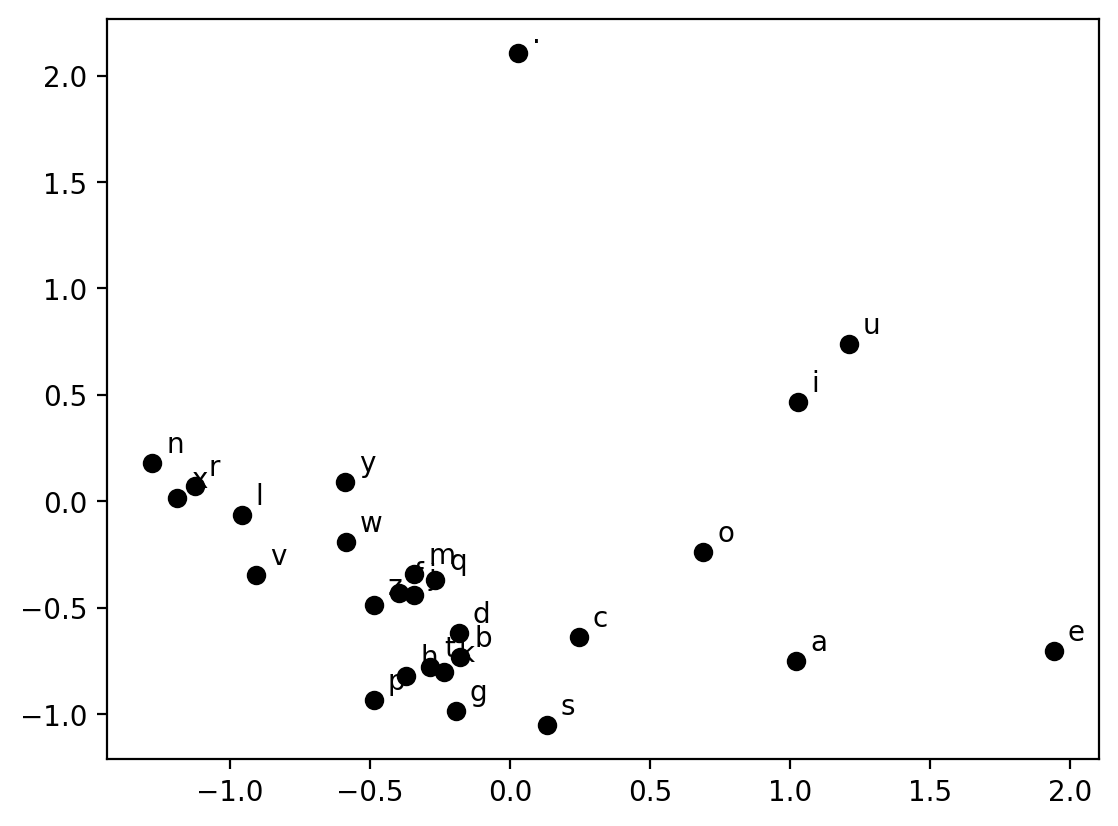

In [ ]:
# Visualize the embedding

plot_emb(model.emb, itos)

In [ ]:
# Generate names from trained model

for i in range(10):
    print(generate_name(model, itos, stoi, block_size))

pahal
ivioa
garibi
soshi
adavidin
kosemarida
tacbi
myabhal
svibinyab
mantu


Tuning knobs

1. Embedding size
2. MLP
3. Context length